# GeoTransformer

In [1]:
%matplotlib widget

In [2]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="2"

In [3]:
!cd /data/wlsgur4011/part_assembly/src/geotransformer/experiments/lomatch/

In [4]:

import sys
sys.path.append("/data/wlsgur4011/part_assembly/src/geotransformer/experiments/lomatch/")
import torch
from config import make_cfg
from model import create_model
from dataset import train_valid_data_loader


In [5]:
cfg = make_cfg()
train_loader, valid_loader, _ = train_valid_data_loader(cfg, False, part_assembly=False)
model = create_model(cfg)

state_dict = torch.load("/data/wlsgur4011/BreakingBad/GeoTransformer/weights/geotransformer-3dmatch.pth.tar", map_location=torch.device('cpu'))
model_dict = state_dict['model']
model.load_state_dict(model_dict, strict=False)
model = model.cuda()
model.eval()

GeoTransformer(
  (backbone): KPConvFPN(
    (encoder1_1): ConvBlock(
      (KPConv): KPConv(kernel_size: 15, in_channels: 1, out_channels: 64, radius: 0.0625, sigma: 0.05, bias: True)
      (norm): GroupNorm(
        (norm): GroupNorm(32, 64, eps=1e-05, affine=True)
      )
      (leaky_relu): LeakyReLU(negative_slope=0.1)
    )
    (encoder1_2): ResidualBlock(
      (unary1): UnaryBlock(
        (mlp): Linear(in_features=64, out_features=32, bias=True)
        (norm): GroupNorm(
          (norm): GroupNorm(32, 32, eps=1e-05, affine=True)
        )
        (leaky_relu): LeakyReLU(negative_slope=0.1)
      )
      (KPConv): KPConv(kernel_size: 15, in_channels: 32, out_channels: 32, radius: 0.0625, sigma: 0.05, bias: True)
      (norm_conv): GroupNorm(
        (norm): GroupNorm(32, 32, eps=1e-05, affine=True)
      )
      (unary2): UnaryBlock(
        (mlp): Linear(in_features=32, out_features=128, bias=True)
        (norm): GroupNorm(
          (norm): GroupNorm(32, 128, eps=1e-05, af

### RUN!!!! (scene data)

In [6]:
from part_assembly.stage3_data import Stage3PairDataset
from part_assembly.stage3 import geo_transformer, stage3_dataloader_format

from jhutil import to_cuda

datafolder = "/data/wlsgur4011/DataCollection/BreakingBad/data_split/"
artifact_train = f"{datafolder}artifact.train.pth"
train_dataset = Stage3PairDataset(artifact_train)

In [7]:
from jhutil import to_cuda

for data_dict in train_loader:
    del data_dict["scene_name"]
    # del data_dict["transform"]
    del data_dict["overlap"]
    del data_dict["src_frame"]
    del data_dict["ref_frame"]
    import jhutil; jhutil.jhprint(1111, data_dict)
    data_dict = to_cuda(data_dict)
    
    output_dict = model(data_dict)
    import jhutil; jhutil.jhprint(5555, output_dict)
    break

1111  {
    "transform": "tensor[4, 4] n=16 x∈[-0.979, 1.000] μ=0.025 σ=0.518",
    "features": "tensor[39479, 1] 0.2Mb x∈[1.000, 1.000] μ=1.000 σ=0.",
    "points": [
        "tensor[39479, 3] n=118437 (0.5Mb) x∈[-2.206, 2.653] μ=0.393 σ=1.160",
        "tensor[9525, 3] n=28575 (0.1Mb) x∈[-2.206, 2.653] μ=0.391 σ=1.150",
        "tensor[2710, 3] n=8130 (32Kb) x∈[-2.206, 2.627] μ=0.374 σ=1.148",
        "tensor[748, 3] n=2244 (8.8Kb) x∈[-2.206, 2.613] μ=0.360 σ=1.142"
    ],
    "lengths": [
        "tensor[2] i64 μ=1.974e+04 σ=2.002e+03 [18324, 21155]",
        "tensor[2] i64 μ=4.762e+03 σ=62.933 [4718, 4807]",
        "tensor[2] i64 μ=1.355e+03 σ=70.711 [1305, 1405]",
        "tensor[2] i64 μ=374.000 σ=32.527 [351, 397]"
    ],
    "neighbors": [
        "tensor[39479, 38] i64 n=1500202 (11Mb) x∈[0, 39479] μ=2.414e+04 σ=1.289e+04",
        "tensor[9525, 36] i64 n=342900 (2.6Mb) x∈[0, 9525] μ=5.696e+03 σ=3.173e+03",
        "tensor[2710, 36] i64 n=97560 (0.7Mb) x∈[0, 2710] μ=1.570e+03

/data/wlsgur4011/part_assembly/src/geotransformer/geotransformer/modules/geotransformer/superpoint_matching.py:44: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ref_sel_indices = corr_indices // matching_scores.shape[1]


9999 
7777  "tensor[256] i64 2Kb x∈[0, 350] μ=170.535 σ=98.373 cuda:0"
6666 
"tensor[256, 64, 3] n=49152 (0.2Mb) x∈[-1.425, 2.653] μ=0.152 σ=0.583 cuda:0"
"tensor[256, 64, 3] n=49152 (0.2Mb) x∈[-2.206, 1.976] μ=0.010 σ=0.579 cuda:0"
"tensor[256, 64] bool n=16384 (16Kb) x∈[False, True] μ=0.228 σ=0.419 cuda:0"
"tensor[256, 64] bool n=16384 (16Kb) x∈[False, True] μ=0.213 σ=0.409 cuda:0"
"tensor[256, 64, 64] n=1048576 (4Mb) x∈[-1.000e+12, -0.348] μ=-9.505e+11 σ=2.170e+11 grad cuda:0"
"tensor[256] 1Kb x∈[0.000, 0.000] μ=0.000 σ=3.853e-05 cuda:0"
5555  {
    "ref_points_c": "tensor[351, 3] n=1053 (4.1Kb) x∈[-1.423, 2.613] μ=0.548 σ=1.021 cuda:0",
    "src_points_c": "tensor[397, 3] n=1191 (4.7Kb) x∈[-2.206, 2.055] μ=0.195 σ=1.216 cuda:0",
    "ref_points_f": "tensor[4718, 3] n=14154 (55Kb) x∈[-1.425, 2.653] μ=0.562 σ=1.020 cuda:0",
    "src_points_f": "tensor[4807, 3] n=14421 (56Kb) x∈[-2.206, 2.086] μ=0.223 σ=1.243 cuda:0",
    "ref_points": "tensor[18324, 3] n=54972 (0.2Mb) x∈[-1.435, 2.65

In [8]:

data_dict["transform"] = torch.eye(4)
data_dict = to_cuda(data_dict)
output_dict = model(data_dict)
import jhutil; jhutil.jhprint(5555, output_dict)

9999 
7777  "tensor[256] i64 2Kb x∈[0, 350] μ=170.535 σ=98.373 cuda:0"
6666 
"tensor[256, 64, 3] n=49152 (0.2Mb) x∈[-1.425, 2.653] μ=0.152 σ=0.583 cuda:0"
"tensor[256, 64, 3] n=49152 (0.2Mb) x∈[-2.206, 1.976] μ=0.010 σ=0.579 cuda:0"
"tensor[256, 64] bool n=16384 (16Kb) x∈[False, True] μ=0.228 σ=0.419 cuda:0"
"tensor[256, 64] bool n=16384 (16Kb) x∈[False, True] μ=0.213 σ=0.409 cuda:0"
"tensor[256, 64, 64] n=1048576 (4Mb) x∈[-1.000e+12, -0.348] μ=-9.505e+11 σ=2.170e+11 grad cuda:0"
"tensor[256] 1Kb x∈[0.000, 0.000] μ=0.000 σ=3.853e-05 cuda:0"
5555  {
    "ref_points_c": "tensor[351, 3] n=1053 (4.1Kb) x∈[-1.423, 2.613] μ=0.548 σ=1.021 cuda:0",
    "src_points_c": "tensor[397, 3] n=1191 (4.7Kb) x∈[-2.206, 2.055] μ=0.195 σ=1.216 cuda:0",
    "ref_points_f": "tensor[4718, 3] n=14154 (55Kb) x∈[-1.425, 2.653] μ=0.562 σ=1.020 cuda:0",
    "src_points_f": "tensor[4807, 3] n=14421 (56Kb) x∈[-2.206, 2.086] μ=0.223 σ=1.243 cuda:0",
    "ref_points": "tensor[18324, 3] n=54972 (0.2Mb) x∈[-1.435, 2.65

In [11]:

import jhutil; jhutil.jhprint(1111, data_dict["transform"])
import jhutil; jhutil.jhprint(2222, output_dict["estimated_transform"])

1111  "tensor[4, 4] n=16 x∈[0., 1.000] μ=0.250 σ=0.447 cuda:0"
2222  "tensor[4, 4] n=16 x∈[-0.980, 1.000] μ=0.027 σ=0.518 cuda:0"


In [12]:

points = data_dict["points"][0]
legnths = data_dict["lengths"][0]
src = points[:legnths[0]]
ref = points[legnths[0]:]

import jhutil; jhutil.jhprint(5555, geo_transformer(src.cpu(), ref.cpu()))

1111  {
    "transform": "tensor[4, 4] n=16 x∈[0., 1.000] μ=0.250 σ=0.447",
    "features": "tensor[39479, 1] 0.2Mb x∈[1.000, 1.000] μ=1.000 σ=0.",
    "points": [
        "tensor[39479, 3] n=118437 (0.5Mb) x∈[-2.206, 2.653] μ=0.393 σ=1.160",
        "tensor[9525, 3] n=28575 (0.1Mb) x∈[-2.206, 2.653] μ=0.391 σ=1.150",
        "tensor[2710, 3] n=8130 (32Kb) x∈[-2.206, 2.627] μ=0.374 σ=1.148",
        "tensor[748, 3] n=2244 (8.8Kb) x∈[-2.206, 2.613] μ=0.360 σ=1.142"
    ],
    "lengths": [
        "tensor[2] i64 μ=1.974e+04 σ=2.002e+03 [18324, 21155]",
        "tensor[2] i64 μ=4.762e+03 σ=62.933 [4718, 4807]",
        "tensor[2] i64 μ=1.355e+03 σ=70.711 [1305, 1405]",
        "tensor[2] i64 μ=374.000 σ=32.527 [351, 397]"
    ],
    "neighbors": [
        "tensor[39479, 38] i64 n=1500202 (11Mb) x∈[0, 39479] μ=2.414e+04 σ=1.289e+04",
        "tensor[9525, 35] i64 n=333375 (2.5Mb) x∈[0, 9525] μ=5.606e+03 σ=3.152e+03",
        "tensor[2710, 35] i64 n=94850 (0.7Mb) x∈[0, 2710] μ=1.550e+03 σ=8

### RUN!!!! (part assembly)

In [6]:
train_loader, valid_loader, _ = train_valid_data_loader(cfg, False, part_assembly=True)

In [7]:
from jhutil import to_cuda

for data_dict in train_loader:
    import jhutil; jhutil.jhprint(1111, data_dict)
    data_dict = to_cuda(data_dict)
    
    output_dict = model(data_dict)
    import jhutil; jhutil.jhprint(2222, output_dict)
    break

1111  {
    "scene_name": "artifact/1344054_sf/mode_13",
    "dir_name": "/data/wlsgur4011/DataCollection/BreakingBad/data_split/artifact/1344054_sf/mode_13",
    "src_file_name": "piece_7.obj",
    "ref_file_name": "piece_8.obj",
    "src_frame": 7,
    "ref_frame": 8,
    "transform": "tensor[4, 4] n=16 x∈[-1.097, 1.000] μ=-0.061 σ=0.608",
    "overlap_score": "tensor 0.089",
    "features": "tensor[1850, 1] 7.2Kb x∈[1.000, 1.000] μ=1.000 σ=0.",
    "points": [
        "tensor[1850, 3] n=5550 (22Kb) x∈[-1.392, 0.989] μ=-2.071e-08 σ=0.363",
        "tensor[619, 3] n=1857 (7.3Kb) x∈[-1.379, 0.989] μ=-0.003 σ=0.376",
        "tensor[224, 3] n=672 (2.6Kb) x∈[-1.349, 0.971] μ=-0.013 σ=0.376",
        "tensor[81, 3] n=243 x∈[-1.336, 0.914] μ=-0.065 σ=0.425"
    ],
    "lengths": [
        "tensor[2] i64 μ=925.000 σ=465.276 [596, 1254]",
        "tensor[2] i64 μ=309.500 σ=166.170 [192, 427]",
        "tensor[2] i64 μ=112.000 σ=52.326 [75, 149]",
        "tensor[2] i64 μ=40.500 σ=23.335 [24,

/data/wlsgur4011/part_assembly/src/geotransformer/geotransformer/modules/geotransformer/superpoint_matching.py:44: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ref_sel_indices = corr_indices // matching_scores.shape[1]


2222  {
    "ref_points_c": "tensor[24, 3] n=72 x∈[-0.478, 0.479] μ=-0.003 σ=0.228 cuda:0",
    "src_points_c": "tensor[57, 3] n=171 x∈[-1.336, 0.914] μ=-0.091 σ=0.482 cuda:0",
    "ref_points_f": "tensor[192, 3] n=576 (2.2Kb) x∈[-0.517, 0.513] μ=4.679e-05 σ=0.222 cuda:0",
    "src_points_f": "tensor[427, 3] n=1281 (5.0Kb) x∈[-1.379, 0.989] μ=-0.005 σ=0.428 cuda:0",
    "ref_points": "tensor[596, 3] n=1788 (7.0Kb) x∈[-0.526, 0.517] μ=3.894e-08 σ=0.217 cuda:0",
    "src_points": "tensor[1254, 3] n=3762 (15Kb) x∈[-1.392, 0.989] μ=-4.918e-08 σ=0.415 cuda:0",
    "gt_node_corr_indices": "tensor[45, 2] i64 n=90 x∈[0, 56] μ=21.644 σ=15.154 cuda:0",
    "gt_node_corr_overlaps": "tensor[45] x∈[0.143, 1.000] μ=0.531 σ=0.248 cuda:0",
    "ref_feats_c": "tensor[24, 256] n=6144 (24Kb) x∈[-0.237, 0.274] μ=0.002 σ=0.062 grad DivBackward0 cuda:0",
    "src_feats_c": "tensor[57, 256] n=14592 (57Kb) x∈[-0.249, 0.208] μ=0.000 σ=0.063 grad DivBackward0 cuda:0",
    "ref_feats_f": "tensor[192, 256] n=4915

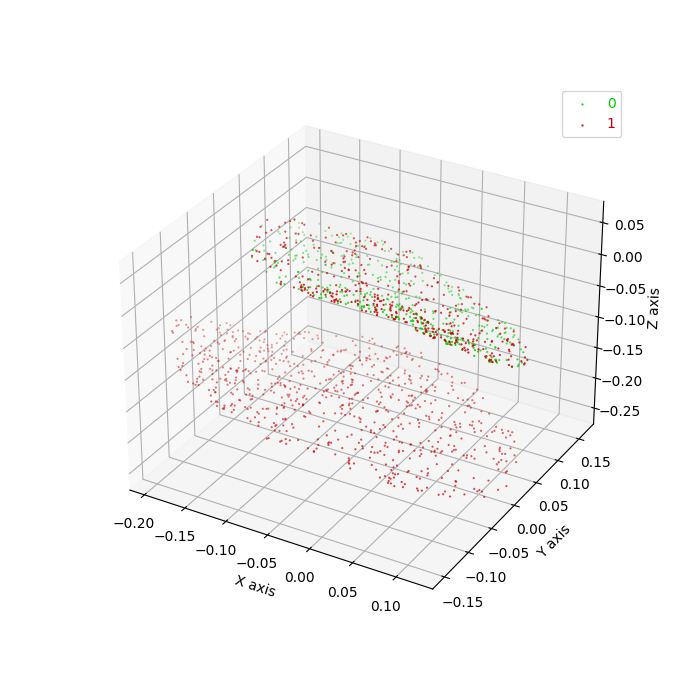

1111  "tensor 0.361"


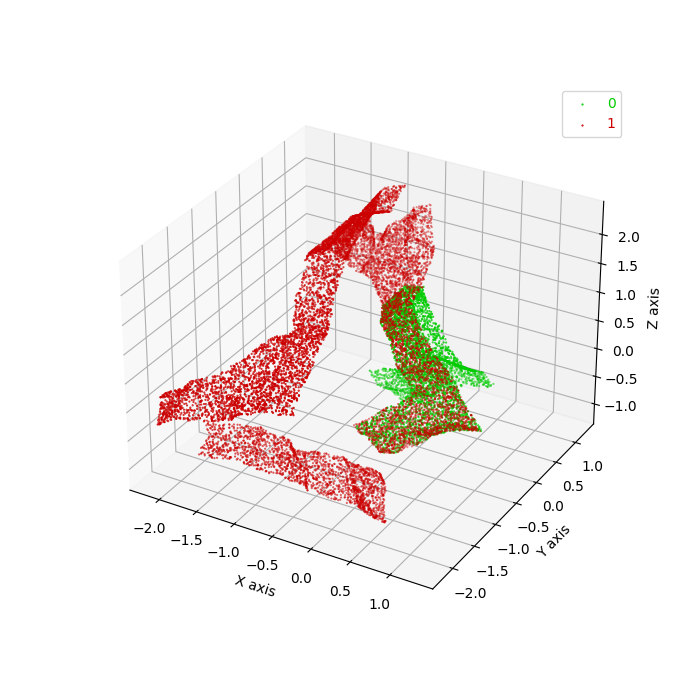

1111  "tensor 0.107"


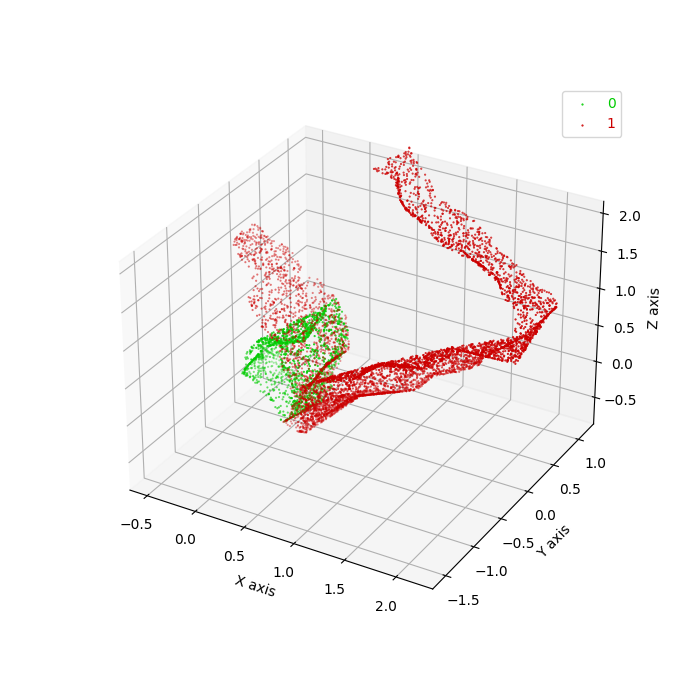

1111  "tensor 0.059"


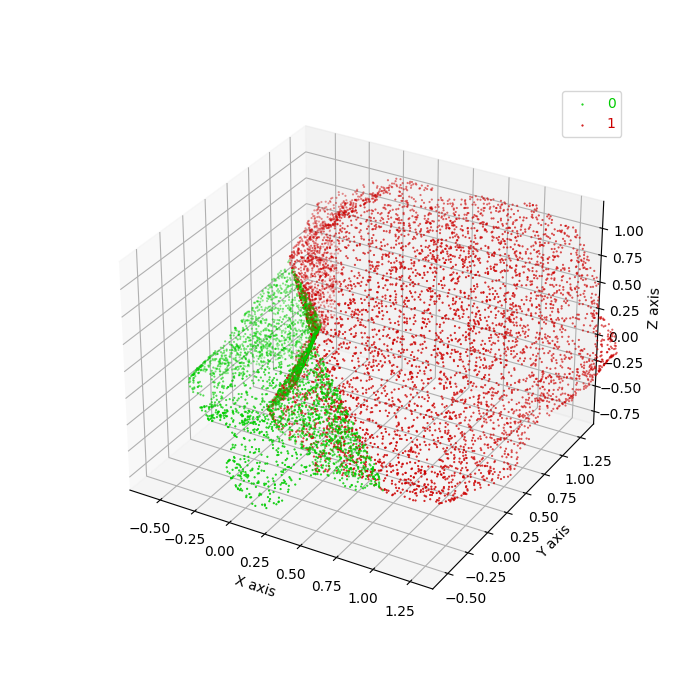

1111  "tensor 0.066"


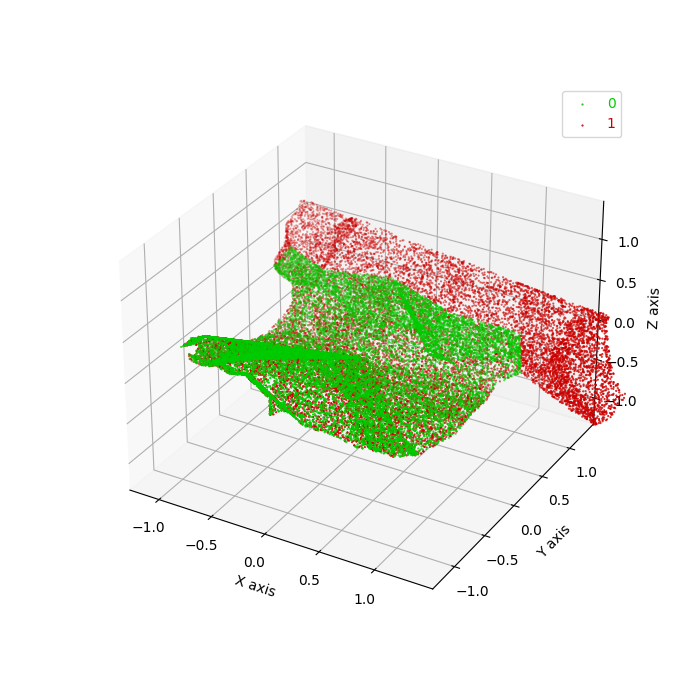

1111  "tensor 0.559"


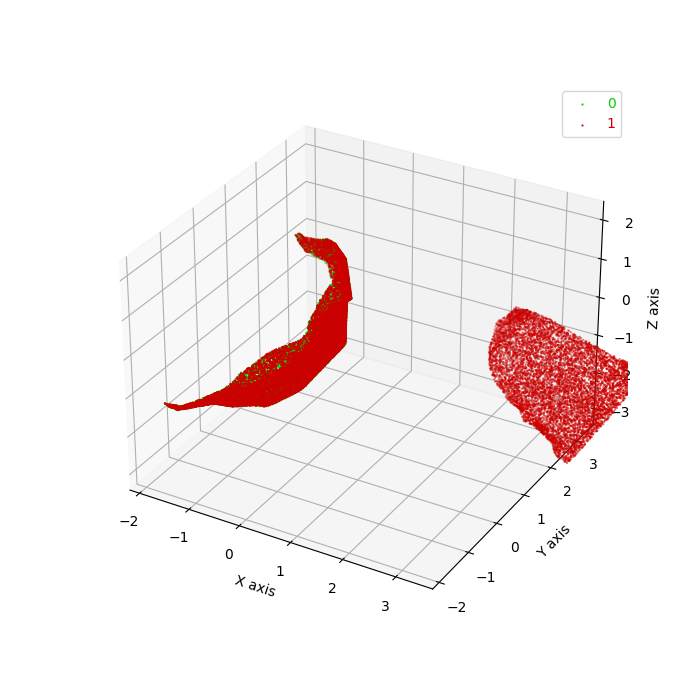

1111  "tensor 0.620"


In [12]:
import jhutil

for i, data in enumerate(train_loader):
    
    
    length = data['lengths'][0]
    src = data['points'][0][:length[0]]
    dst = data['points'][0][length[0]:]
    transform = data["transform"]
    dst = jhutil.matrix_transform(transform, dst)
    
    import jhutil; jhutil.show_point_clouds([src, dst])
    
    import jhutil; jhutil.jhprint(1111, data["overlap_score"])
    if i == 5:
        break